In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
experiments = pd.read_csv("../results/experiments.csv")
#experiments = pd.read_csv("../experiments.csv")

In [4]:
experiments

,RUN,modelname,data,num_units,num_blocks,epochs,batch_size,learningrate,optimizer,dropout,...,AE_1,AE_2,AE_3,AE_4,AE_5,TC_t_1,TC_t_2,TC_t_3,TC_t_4,TC_t_5
0,0,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,13.193420,12.971055,13.480948,13.424916,14.250611,0.0,0.401425,0.361498,0.223038,0.145159
1,1,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,13.542580,13.167601,13.613719,13.551432,14.365966,0.0,0.716537,0.181285,0.111100,0.073158
2,2,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,13.103835,12.987243,13.574849,13.606878,14.469911,0.0,0.514523,0.143945,0.103640,0.133015
3,3,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,13.301361,12.813811,13.344928,13.347926,14.265526,0.0,0.837860,0.386102,0.190290,0.142966
4,4,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,12.972703,13.001880,13.558743,13.583575,14.340341,0.0,0.755476,0.215686,0.177896,0.165955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,LSTM,hospital_billing,100,2,200,128,0.01,NADAM,0.2,...,67.993587,44.346182,41.978316,39.119387,42.381532,0.0,1.834878,2.109112,1.580696,2.433303
156,156,LSTM,hospital_billing,100,2,200,128,0.01,NADAM,0.2,...,70.469499,44.973510,41.908268,39.532631,42.002239,0.0,1.708861,1.013340,2.086441,2.173564
157,157,LSTM,hospital_billing,100,2,200,128,0.01,NADAM,0.2,...,69.835864,45.143645,41.554904,39.034665,42.082421,0.0,1.370082,1.373548,1.908190,2.323803
158,158,LSTM,hospital_billing,100,2,200,128,0.01,NADAM,0.2,...,69.052659,44.989154,41.387211,38.958338,42.693385,0.0,1.951126,1.625852,2.052640,4.442858


In [5]:
experiments.columns

Index(['RUN', 'modelname', 'data', 'num_units', 'num_blocks', 'epochs',
       'batch_size', 'learningrate', 'optimizer', 'dropout', 'early_stop',
       'lr_reduce', 'sgd_momentum', 'loss_function', 'alpha', 'beta', 'gamma',
       'n_estimators', 'max_depth', 'eta', 'subsample', 'colsample_bytree',
       'y_transformation', 'sim_save_eventlog', 'sim_statespace_size',
       'sim_number_of_traces', 'sim_process_entropy', 'sim_process_type',
       'sim_process_memory', 'sim_med_ent_e_steps',
       'sim_med_ent_n_transitions', 'sim_med_ent_max_trials',
       'sim_inter_arrival_time', 'sim_process_stability_scale',
       'sim_resource_availability_p', 'sim_resource_availability_n',
       'sim_resource_availability_m', 'sim_activity_duration_lambda_range',
       'sim_deterministic_offset_W', 'Deterministic_offset_u',
       'data_inference_tables', 'data_last_state', 'data_n_traces',
       'data_max_prefix_length', 'data_min_prefix_length', 'data_split_mode',
       'data_train_ra

In [6]:
earliness = []

for run in experiments.RUN:
    sub = experiments.loc[experiments.RUN == run]
    
    loss_function = sub.loss_function.values[0]
    data = sub.data.values[0]
    
    MAE_t = [sub.AE_1.values[0],
              sub.AE_2.values[0],
              sub.AE_3.values[0],
              sub.AE_4.values[0],
              sub.AE_5.values[0]]
    
    ear_i = pd.DataFrame({"RUN":[run]*len(MAE_t),
                          "loss_function":[loss_function]*len(MAE_t),
                          "data":[data]*len(MAE_t),
                          "event_number":list(range(1,len(MAE_t)+1)),
                          "MAE_t":MAE_t})
    earliness.append(ear_i)

In [7]:
earliness = pd.concat(earliness)
earliness

,RUN,loss_function,data,event_number,MAE_t
0,0,MAE,sepsis,1,13.193420
1,0,MAE,sepsis,2,12.971055
2,0,MAE,sepsis,3,13.480948
3,0,MAE,sepsis,4,13.424916
4,0,MAE,sepsis,5,14.250611
...,...,...,...,...,...
0,159,MAE_Etd,hospital_billing,1,71.826154
1,159,MAE_Etd,hospital_billing,2,45.554512
2,159,MAE_Etd,hospital_billing,3,41.625184
3,159,MAE_Etd,hospital_billing,4,39.028198


In [8]:
# sort the table
#sorter = ['MAE', 'MAE_Etd', 'MAE_Ptd', 'MAE_Mtd']
#earliness.sort_values(by="loss_function", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)


# MAE by timestep

In [9]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    
    ci = np.round(h,2)
    mean = np.round(m,2)
    string = str(mean)+ " ! " +str(ci)
    return string


df = pd.pivot_table(earliness, 
                    index=["event_number",'loss_function'], 
                    columns="data", 
                    values="MAE_t",
                    aggfunc=mean_confidence_interval)


# change order
df = df[['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']]

string = str((df.to_latex(index=True)))
string = string.replace('!', '$\pm$')
string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace('sepsis', 'Sepsis')
string = string.replace('helpdesk', 'Helpdesk')
string = string.replace('traffic\_fines', 'Traffic fines')
string = string.replace('hospital\_billing', 'Hospital billing')


string = string.replace("llllll","|l|l|l|l|l|l|")

string = string.replace("loss\_function","Loss function")

string = string.replace("event\_number","Prefix")
string = string.replace("data","")


string = string.replace("MAE &","$MAE$ &")
string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")
df

C:\Users\Mike\AppData\Local\Temp\ipykernel_31992\747537534.py:26: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((df.to_latex(index=True)))


data                              sepsis      helpdesk   traffic_fines  \
event_number loss_function                                               
1            MAE            13.27 ! 0.21   7.07 ! 0.05   227.46 ! 3.66   
             MAE_Etd         13.14 ! 0.2   7.06 ! 0.16   222.11 ! 2.36   
             MAE_Mtd        13.17 ! 0.22   7.06 ! 0.16    225.24 ! 5.2   
             MAE_Ptd        13.35 ! 0.24   7.08 ! 0.14   224.26 ! 4.43   
2            MAE             13.0 ! 0.17   8.52 ! 0.23   217.32 ! 3.93   
             MAE_Etd        12.91 ! 0.09   8.39 ! 0.21   212.08 ! 2.08   
             MAE_Mtd        12.94 ! 0.13   8.29 ! 0.23   212.22 ! 3.73   
             MAE_Ptd         13.08 ! 0.2   8.31 ! 0.31    213.2 ! 2.64   
3            MAE            13.52 ! 0.16   9.68 ! 0.37   218.67 ! 4.33   
             MAE_Etd        13.43 ! 0.08    9.4 ! 0.36   212.99 ! 3.35   
             MAE_Mtd        13.47 ! 0.13   9.33 ! 0.43    213.2 ! 4.05   
             MAE_Ptd         13.59 ! 0.2   9.53 ! 0.62   213.49 ! 3.55   
4            MAE             13.5 ! 0.15  12.72 ! 1.22   198.79 ! 4.71   
             MAE_Etd        13.43 ! 0.07  10.88 ! 1.34   195.22 ! 3.77   
             MAE_Mtd        13.47 ! 0.12  11.06 ! 0.96    195.39 ! 4.5   
             MAE_Ptd         13.58 ! 0.2  12.14 ! 1.87     196.2 ! 4.5   
5            MAE            14.37 ! 0.15  12.93 ! 1.39  201.82 ! 16.99   
             MAE_Etd         14.3 ! 0.07   11.19 ! 1.5   193.57 ! 1.58   
             MAE_Mtd        14.33 ! 0.13  11.29 ! 0.76  200.39 ! 16.97   
             MAE_Ptd         14.44 ! 0.2  12.27 ! 1.86   196.25 ! 5.04   

data                       hospital_billing  
event_number loss_function                   
1            MAE                70.2 ! 1.22  
             MAE_Etd            70.0 ! 1.38  
             MAE_Mtd           69.12 ! 1.07  
             MAE_Ptd           69.31 ! 1.24  
2            MAE               45.37 ! 0.56  
             MAE_Etd           45.23 ! 0.43  
             MAE_Mtd            45.3 ! 0.39  
             MAE_Ptd           45.13 ! 0.49  
3            MAE               42.23 ! 0.54  
             MAE_Etd           41.99 ! 0.45  
             MAE_Mtd           42.18 ! 0.55  
             MAE_Ptd           42.21 ! 0.54  
4            MAE               39.32 ! 0.45  
             MAE_Etd            39.0 ! 0.41  
             MAE_Mtd            39.3 ! 0.45  
             MAE_Ptd           39.56 ! 0.44  
5            MAE               42.14 ! 0.41  
             MAE_Etd            42.1 ! 0.32  
             MAE_Mtd           42.19 ! 0.28  
             MAE_Ptd           42.42 ! 0.37

In [10]:
print(string)

\begin{tabular}{|l|l|l|l|l|l|}
\hline
  &  &        Sepsis &      Helpdesk &   Traffic fines & Hospital billing \\
Prefix & Loss function &               &               &                 &                  \\
\hline
1 & $MAE$ &  13.27 $\pm$ 0.21 &   7.07 $\pm$ 0.05 &   227.46 $\pm$ 3.66 &      70.2 $\pm$ 1.22 \\
  & $MAE_{EtD}$ &   13.14 $\pm$ 0.2 &   7.06 $\pm$ 0.16 &   222.11 $\pm$ 2.36 &      70.0 $\pm$ 1.38 \\
  & $MAE_{MtD}$ &  13.17 $\pm$ 0.22 &   7.06 $\pm$ 0.16 &    225.24 $\pm$ 5.2 &     69.12 $\pm$ 1.07 \\
  & $MAE_{PtD}$ &  13.35 $\pm$ 0.24 &   7.08 $\pm$ 0.14 &   224.26 $\pm$ 4.43 &     69.31 $\pm$ 1.24 \\
2 & $MAE$ &   13.0 $\pm$ 0.17 &   8.52 $\pm$ 0.23 &   217.32 $\pm$ 3.93 &     45.37 $\pm$ 0.56 \\
  & $MAE_{EtD}$ &  12.91 $\pm$ 0.09 &   8.39 $\pm$ 0.21 &   212.08 $\pm$ 2.08 &     45.23 $\pm$ 0.43 \\
  & $MAE_{MtD}$ &  12.94 $\pm$ 0.13 &   8.29 $\pm$ 0.23 &   212.22 $\pm$ 3.73 &      45.3 $\pm$ 0.39 \\
  & $MAE_{PtD}$ &   13.08 $\pm$ 0.2 &   8.31 $\pm$ 0.31 &    213.2 

## F-test

In [11]:
def f_test(group1, group2, log_trans=False):
    
    #log transform
    if log_trans == True:
        group1 = np.log(1+group1)
        group2 = np.log(1+group2)
    
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
  

In [12]:
datasets = ['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']
loss_functions = ['MAE_Mtd', 'MAE_Ptd', 'MAE_Etd']

prefixes = [1,2,3,4,5]

res = {"event_log":[],
       "prefix":[],
      "loss_function":[],
      "f_value":[],
      "p_value":[]}

#do a comparison for each dataset
for dataset in datasets:
    results_1 = earliness.loc[earliness.data == dataset]
    
    # do a comparison for each prefix
    for prefix in prefixes:
        results = results_1.loc[results_1.event_number == prefix]
    
        #do a comparison with MAE for each of the three losses
        for loss in loss_functions:

            #get MAE vectors, n = 10
            baseline = results.loc[results.loss_function == "MAE","MAE_t"]
            loss_i = results.loc[results.loss_function == loss,"MAE_t"]

            #perform f_test:
            f_value, p_value = f_test(baseline.values, loss_i.values, log_trans=False)

            #append results
            res["event_log"].append(dataset)
            res["prefix"].append(prefix)
            res["loss_function"].append(loss)
            res["f_value"].append(np.round(f_value,decimals=3))
            res["p_value"].append(np.round(p_value,decimals=3))
res = pd.DataFrame(res)

Highlighting f-test results is done manually by looking up datasets below

In [13]:
res.loc[res.event_log == "helpdesk"]

,event_log,prefix,loss_function,f_value,p_value
15,helpdesk,1,MAE_Mtd,0.106,0.999
16,helpdesk,1,MAE_Ptd,0.133,0.997
17,helpdesk,1,MAE_Etd,0.098,0.999
18,helpdesk,2,MAE_Mtd,1.012,0.493
19,helpdesk,2,MAE_Ptd,0.565,0.796
20,helpdesk,2,MAE_Etd,1.178,0.406
21,helpdesk,3,MAE_Mtd,0.721,0.683
22,helpdesk,3,MAE_Ptd,0.345,0.935
23,helpdesk,3,MAE_Etd,1.019,0.489
24,helpdesk,4,MAE_Mtd,1.605,0.246


# MAE_t with all prefixes

In [14]:
inference_list = []

for i in experiments.RUN:
    #Load data objects to get the inference table
    file = "experiment_"+str(i)
    with open('../results/'+file+'.pickle', 'rb') as handle:
        data_objects = pickle.load(handle)
    #print(file)
    
    # get inference table for MAE calculation
    inf_test = data_objects["inference_test"]
    
       
    # get actual trace lengths
    #inf_test = get_max_prefix(inf_test)
    
    
    #Crosstab TC_t by trace length    
    pivottable = pd.pivot_table(inf_test, 
                                    values=["AE","y","y_pred"],
                                    columns=['prefix_number'], 
                                    aggfunc=np.mean).T
    
    pivottable["AE"] = pivottable["AE"]/(24.0*3600) #convert to days
    pivottable["y"] = pivottable["y"]/(24.0*3600) #convert to days
    pivottable["y_pred"] = pivottable["y_pred"]/(24.0*3600) #convert to days
    
    pivottable = pivottable.rename(columns={"AE":"MAE_t"})
    
    pivottable = pivottable.reset_index()
        
    #mark with needed information
    pivottable["data"] = data_objects['curr_settings']["data"]
    pivottable["loss_function"] = data_objects['curr_settings']["loss_function"]
    
        
    inference_list.append(pivottable)

In [15]:
inference_list = pd.concat(inference_list)
inference_list

,prefix_number,MAE_t,y,y_pred,data,loss_function
0,1,13.193420,14.835966,2.244638,sepsis,MAE
1,2,12.971055,14.825796,2.520435,sepsis,MAE
2,3,13.480948,15.489498,2.929078,sepsis,MAE
3,4,13.424916,15.480863,3.078261,sepsis,MAE
4,5,14.250611,16.481169,3.272286,sepsis,MAE
...,...,...,...,...,...,...
14,15,24.834369,26.331733,16.869433,hospital_billing,MAE_Etd
15,16,21.615272,22.408169,13.783423,hospital_billing,MAE_Etd
16,17,21.722974,16.831974,0.713634,hospital_billing,MAE_Etd
17,18,18.151029,10.224847,-4.889570,hospital_billing,MAE_Etd


C:\Users\Mike\AppData\Local\Temp\ipykernel_31992\647342357.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


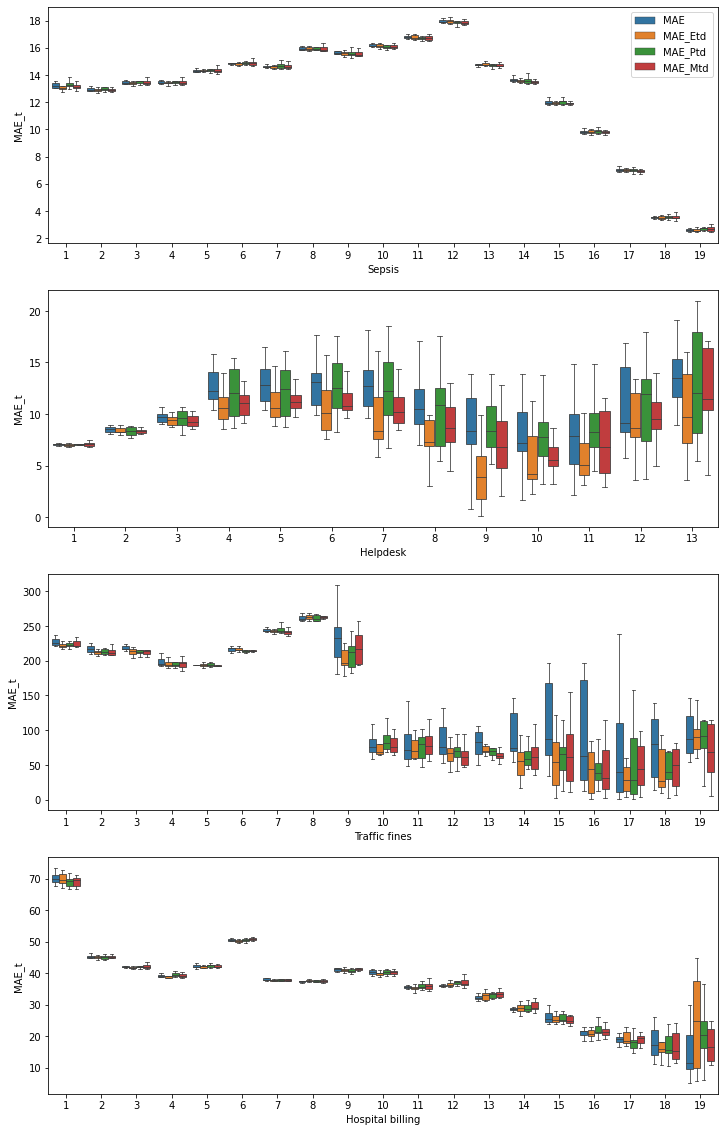

In [16]:
#fig, ax = plt.subplots(2,2, figsize=(16, 10))
fig, ax = plt.subplots(4, figsize=(12, 20))

metric = ["MAE_t","y"][0]
xaxis = "prefix_number"
hue = "loss_function"

hue_order = ['MAE','MAE_Etd', 'MAE_Ptd', 'MAE_Mtd']

fliersize = 1
width = 0.8
lwidth = 0.8

# Exclude some results
sepsis = inference_list.loc[inference_list.data == "sepsis"]

sns.boxplot(x=sepsis[xaxis], 
            y=sepsis[metric],
            hue=sepsis[hue],
            hue_order = hue_order,
            #saturation=0.5,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=lwidth,
            whis=1.5, 
            ax=ax[0])



helpdesk = inference_list.loc[inference_list.data == "helpdesk"]

sns.boxplot(x=helpdesk[xaxis], 
            y=helpdesk[metric],
            hue=helpdesk[hue],
            hue_order = hue_order,
            #saturation=0.5,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=lwidth,
            whis=1.5, 
            ax=ax[1])


traffic_fines = inference_list.loc[inference_list.data == "traffic_fines"]

sns.boxplot(x=traffic_fines[xaxis], 
            y=traffic_fines[metric],
            hue=traffic_fines[hue],
            hue_order = hue_order,
            #saturation=0.5,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=lwidth,
            whis=1.5, 
            ax=ax[2])

hospital_billing = inference_list.loc[inference_list.data == "hospital_billing"]

sns.boxplot(x=hospital_billing[xaxis], 
            y=hospital_billing[metric],
            hue=hospital_billing[hue],
            hue_order = hue_order,
            #saturation=0.5,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=lwidth,
            whis=1.5, 
            ax=ax[3])


ax[0].set(xlabel='Sepsis', ylabel=metric)#, xlim=[-0.5,6])
ax[0].legend(loc='upper right')
ax[1].set(xlabel='Helpdesk', ylabel=metric)#, xlim=[-0.5,6])
ax[1].legend([],[], frameon=False)
ax[2].set(xlabel='Traffic fines', ylabel=metric)#, xlim=[-0.5,6])
ax[2].legend([],[], frameon=False)
ax[3].set(xlabel='Hospital billing', ylabel=metric)#, xlim=[-0.5,6])
ax[3].legend([],[], frameon=False)


plt.savefig("earliness_results.png", dpi=300, bbox_inches = "tight")

fig.show()

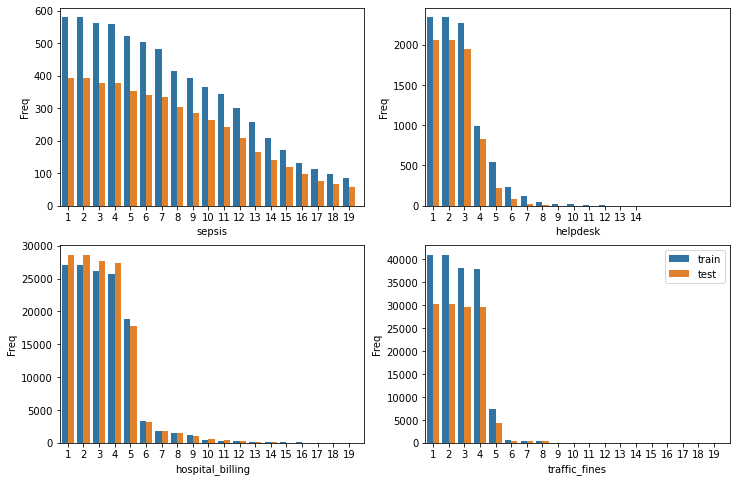